### Aplicação do efeito de bloom

In [27]:
# Importa as dependências
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [28]:
# Extrai algumas informações da imagem, tipo o L C e P :)
image = np.array(Image.open("cactus.jpg"))[:, :, :3]
l, c, p = image.shape

# Peso de mistura das imagens
bloom_amount = 13
bloom_smooth = 17
mix_amount = 0.9
threshold = 30

# Calcula a imagem em preto e branco
bw_image = np.average(image[:, :, :3], axis=2)

# Utiliza o método avarage para converter para uma imagem binária
thresholding_amount = (np.max(bw_image) - threshold)
blur = (bw_image > thresholding_amount).astype(int) * 255

# Aplica filtro de blur para realizar o espalhamento dos pixels
for x in range(bloom_smooth):
    blur = (gaussian_filter(blur, sigma=bloom_amount) * 255) / np.max(blur)

# Aplica o efeito de defasagem dos 
# pixels coloridos nas bordas da imagem
bloom = np.zeros(shape=(l, c, p), dtype=np.uint8)

# Realiza a junção das imagens com base no fator, para cada pixel de cada canal de cor
bloom[:, :, 0] = (mix_amount * image[:, :, 0]) + ((1 - mix_amount) * blur)
bloom[:, :, 1] = (mix_amount * image[:, :, 1]) + ((1 - mix_amount) * blur)
bloom[:, :, 2] = (mix_amount * image[:, :, 2]) + ((1 - mix_amount) * blur)

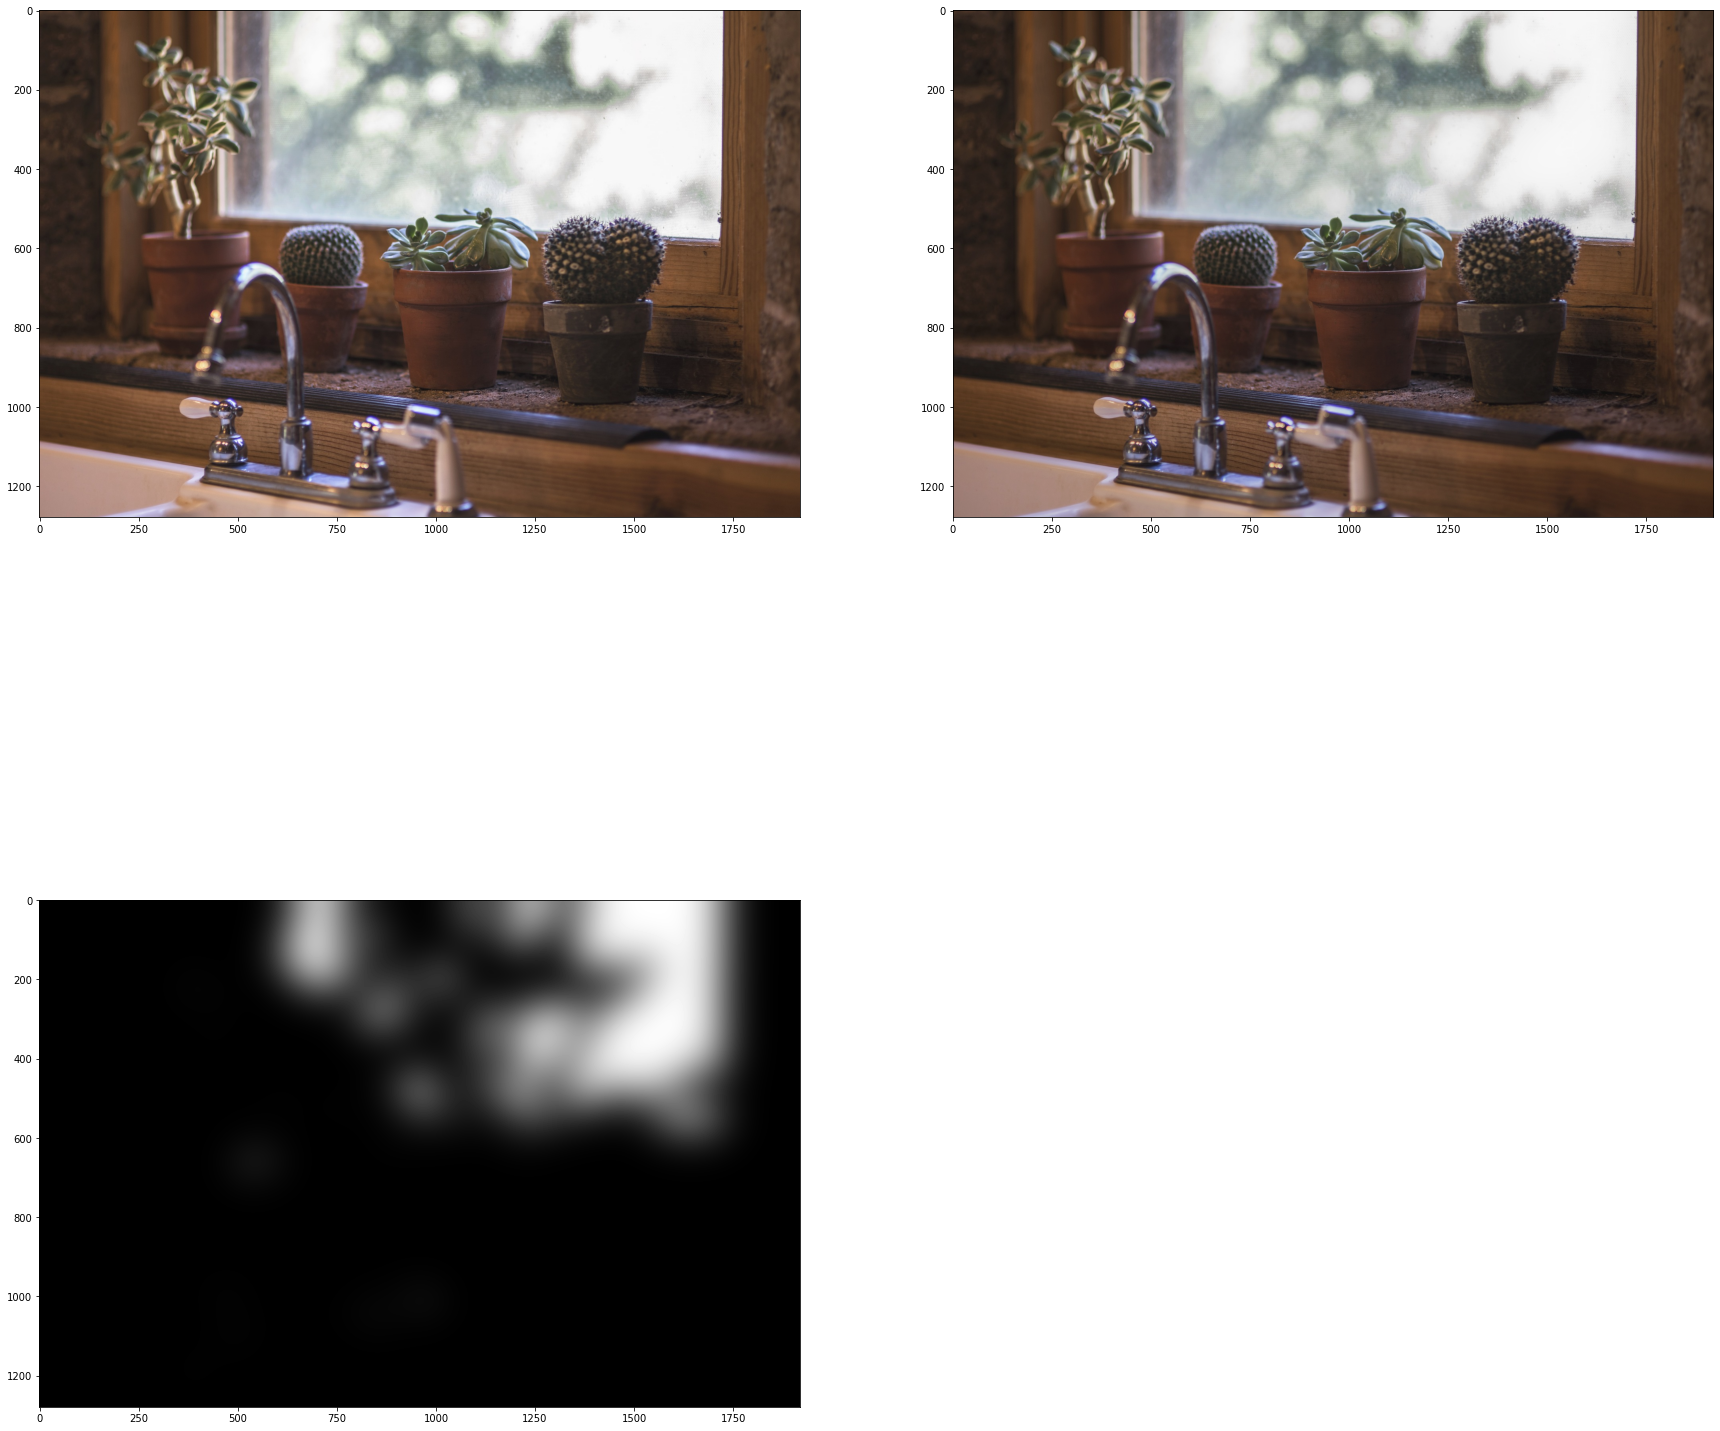

In [29]:
# Mostra os resultados 
# da conversão
plt.figure(figsize=(30, 30))
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.subplot(2, 2, 2)
plt.imshow(bloom)
plt.subplot(2, 2, 3)
plt.imshow(blur, cmap='gray')

# Salva a figura
# plt.savefig("bloom.png")

In [30]:
# Converte a imagem
img_bin = Image.fromarray(bloom)
msk_bin = Image.fromarray(blur)

# Converte a imagem para RGB e salva
img_bin.convert('RGB').save('bloom_3.png')
msk_bin.convert('RGB').save('bloom_msk_3.png')